# Data Analysis

In this notebook, we load the framewise displacement data and perform some exploratory data analysis by generating some visualizations of the data.

In [ ]:
# add modules to path
import sys
sys.path.insert(1, '../src')

# library imports
import torch
import random
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# project imports
import data_processing as dp
import train_eval as te
import models_nn as mnn

# autoreload all modules
%load_ext autoreload
%autoreload 2


## Setup Training and Load Data

In [ ]:
# training device
DEVICE = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"


In [3]:
# Load the data from the .npz file
data_dict_ppmi, pd_keys, control_keys = dp.load_ppmi_data()
data_dict_hcp = dp.load_hcp_data()


Loaded 320/364 PD subjects and 44/88 Control subjects
Loaded 724 run-01 subject combinations


## Preprocess / Balance Data

In [4]:
# ----------------------- Hyper-parameters ----------------------- #
MAX_LEN = 200  # truncate / zero-pad sequences to this length
BATCH_SIZE = 32
EPOCHS = 25
LR = 2e-3
RNG_SEED = 42

random.seed(RNG_SEED)
np.random.seed(RNG_SEED)
torch.manual_seed(RNG_SEED)


In [ ]:
# Create balanced dataset: Controls = PD patients
balanced_pd_dataset, info = dp.create_balanced_pd_classification_dataset(
    data_dict_ppmi, pd_keys, control_keys, data_dict_hcp,
    feature_idx=1,  # RMSD
    harmonization_method='quantile_matching',
    balance_strategy='match_pd'  # Total controls = number of PD patients
)

print(f"Dataset size: {len(balanced_pd_dataset)}")
print(f"Balance ratio: {info['balance_ratio']:.1f}:1 (Controls:PD)")

# Train your model
train_loader, val_loader = te.train_val_split(
    balanced_pd_dataset, val_size=0.2, random_state=RNG_SEED, batch_size=BATCH_SIZE
)


Creating balanced PD classification dataset:
  PPMI PD patients: 320
  PPMI controls: 44
  HCP available: 724
  Strategy: match_pd
  PPMI controls to use: 44
  HCP samples to use: 276
  Total controls: 320
  PD patients: 320
  Final ratio (Controls:PD): 1.0:1
  Harmonizing 276 HCP samples to match PPMI distribution...

Created balanced PD classification dataset:
  Total controls: 320 (PPMI: 44, HCP harmonized: 276)
  Total PD: 320
  Total samples: 640
  Class balance ratio: 1.00:1 (Controls:PD)
  Harmonization method: quantile_matching
Dataset size: 640
Balance ratio: 1.0:1 (Controls:PD)


In [ ]:
balanced_pd_dataset


<data_processing.create_balanced_pd_classification_dataset.<locals>.BalancedPDDataset at 0x7fe794a14070>

## Train

In [ ]:
# "GRU": mnn.RNNClassifier(cell="gru"),
# "LSTM": mnn.RNNClassifier(cell="lstm"),
# "Transformer": mnn.TransformerClassifier()

transformer = mnn.TransformerClassifier()

history = te.train(
    transformer, train_loader, val_loader,
    device=DEVICE, epochs=EPOCHS*40, lr=LR / 5, plot=True, 
    class_names=["Controls", "PD"]  # Now these labels are correct!
)


Training Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 01:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 02:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 03:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 04:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 05:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 06:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 07:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 08:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 09:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 10:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 11:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 12:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 13:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 14:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 15:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 16:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 17:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 18:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 19:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 20:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 21:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 22:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 23:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 24:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 25:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 26:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 27:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 28:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 29:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 30:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 31:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 32:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 33:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 34:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 35:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 36:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 37:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 38:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 39:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 40:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 41:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 42:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 43:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 44:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 45:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 46:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 47:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 48:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 49:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 50:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 51:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 52:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 53:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 54:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 55:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 56:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 57:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 58:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 59:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 60:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 61:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 62:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 63:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 64:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 65:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 66:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 67:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 68:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 69:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 70:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 71:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 72:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 73:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 74:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 75:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 76:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 77:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 78:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 79:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 80:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 81:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 82:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 83:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 84:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 85:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 86:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 87:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 88:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 89:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 90:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 91:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 92:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 93:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 94:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 95:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 96:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 97:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 98:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 99:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 100:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 101:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 102:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 103:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 104:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 105:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 106:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 107:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 108:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 109:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 110:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 111:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 112:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 113:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 114:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 115:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 116:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 117:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 118:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 119:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 120:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 121:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 122:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 123:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 124:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 125:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 126:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 127:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 128:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 129:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 130:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 131:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 132:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 133:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 134:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 135:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 136:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 137:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 138:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 139:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 140:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 141:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 142:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 143:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 144:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 145:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 146:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 147:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 148:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 149:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 150:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 151:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 152:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 153:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 154:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 155:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 156:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 157:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 158:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 159:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 160:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 161:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 162:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 163:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 164:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 165:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 166:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 167:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 168:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 169:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 170:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 171:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 172:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 173:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 174:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 175:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 176:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 177:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 178:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 179:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 180:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 181:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 182:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 183:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 184:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 185:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 186:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 187:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 188:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 189:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 190:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 191:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 192:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 193:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 194:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 195:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 196:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 197:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 198:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 199:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 200:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 201:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 202:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 203:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 204:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 205:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 206:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 207:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 208:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 209:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 210:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 211:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 212:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 213:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 214:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 215:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 216:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 217:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 218:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 219:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 220:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 221:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 222:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 223:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 224:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 225:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 226:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 227:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 228:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 229:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 230:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 231:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 232:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 233:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 234:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 235:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 236:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 237:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 238:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 239:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 240:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 241:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 242:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 243:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 244:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 245:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 246:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 247:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 248:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 249:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 250:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 251:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 252:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 253:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 254:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 255:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 256:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 257:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 258:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 259:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 260:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 261:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 262:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 263:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 264:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 265:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 266:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 267:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 268:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 269:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 270:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 271:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 272:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 273:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 274:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 275:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 276:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 277:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 278:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 279:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 280:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 281:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 282:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 283:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 284:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 285:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 286:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 287:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 288:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 289:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 290:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 291:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 292:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 293:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 294:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 295:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 296:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 297:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 298:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 299:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 300:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 301:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 302:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 303:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 304:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 305:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 306:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 307:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 308:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 309:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 310:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 311:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 312:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 313:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 314:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 315:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 316:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 317:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 318:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 319:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 320:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 321:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 322:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 323:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 324:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 325:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 326:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 327:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 328:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 329:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 330:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 331:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 332:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 333:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 334:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 335:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 336:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 337:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 338:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 339:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 340:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 341:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 342:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 343:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 344:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 345:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 346:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 347:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 348:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 349:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 350:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 351:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 352:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 353:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 354:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 355:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 356:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 357:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 358:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 359:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 360:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 361:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 362:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 363:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 364:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 365:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 366:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 367:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 368:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 369:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 370:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 371:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 372:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 373:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 374:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 375:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 376:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 377:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 378:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 379:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 380:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 381:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 382:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 383:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 384:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 385:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 386:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 387:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 388:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 389:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 390:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 391:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 392:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 393:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 394:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 395:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 396:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 397:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 398:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 399:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 400:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 401:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 402:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 403:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 404:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 405:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 406:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 407:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 408:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 409:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 410:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 411:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 412:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 413:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 414:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 415:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 416:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 417:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 418:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 419:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 420:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 421:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 422:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 423:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 424:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 425:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 426:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 427:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 428:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 429:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 430:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 431:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 432:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 433:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 434:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 435:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 436:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 437:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 438:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 439:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 440:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 441:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 442:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 443:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 444:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 445:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 446:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 447:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 448:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 449:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 450:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 451:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 452:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 453:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 454:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 455:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 456:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 457:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 458:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 459:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 460:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 461:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 462:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 463:   0%|          | 0/16 [00:00<?, ?it/s]

KeyboardInterrupt: 

## Dataset Discrimination

In [ ]:
# keys = pd_keys + control_keys
# random.shuffle(keys)
# dataset = dp.MotionDataset(data_dict, keys, MAX_LEN)

# Load data
data_dict_ppmi, pd_keys, control_keys = dp.load_ppmi_data()
data_dict_hcp = dp.load_hcp_data(run_1_only=True)  # Only run-01

# Create dataset
dataset = dp.MotionDataset(
    datasets=[
        (data_dict_ppmi, pd_keys, 1, 'ppmi'),           # PD
        (data_dict_ppmi, control_keys, 0, 'ppmi'),      # Control  
        # (data_dict_hcp, list(data_dict_hcp.keys())[0:276], 0, 'hcp'),  # HCP (as controls)
    ],
    max_len=MAX_LEN
)

print("Dataset size:", len(dataset))

train_loader, val_loader = te.train_val_split(
        dataset, val_size=0.2, random_state=RNG_SEED, batch_size=BATCH_SIZE
)


Loaded 320/364 PD subjects and 44/88 Control subjects
Loaded 724 run-01 subject combinations
Dataset size: 628


In [ ]:
import data_processing as dp
import models_nn as mnn
import train_eval as te
import torch

# Load your data
data_dict_ppmi, pd_keys, control_keys = dp.load_ppmi_data()
data_dict_hcp = dp.load_hcp_data(run_1_only=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Run the single-feature discrimination test
results = te.run_single_feature_discrimination_test(
    data_dict_ppmi=data_dict_ppmi,
    control_keys=control_keys,
    data_dict_hcp=data_dict_hcp,
    device=device,
    max_len=200,
    epochs=100,
    batch_size=16,
    random_state=42
)


Loaded 320/364 PD subjects and 44/88 Control subjects
Loaded 724 run-01 subject combinations
SINGLE-FEATURE DATASET DISCRIMINATION TEST
Testing which feature drives dataset discrimination...


TESTING FEATURE 0: Framewise Displacement (FD vs FD_equivalent)
Creating single-feature discrimination test:
  Feature 0: PPMI='framewise_displacement' vs HCP='framewise_displacement_equivalent'
  Using 44 samples from each dataset

--- Testing Transformer on Framewise Displacement (FD vs FD_equivalent) ---


Epoch 01/100  loss=0.9806  val_acc=0.412  val_bal_acc=0.500  val_auc=0.857


Epoch 02/100  loss=0.8873  val_acc=0.471  val_bal_acc=0.529  val_auc=0.814


Epoch 03/100  loss=0.7249  val_acc=0.588  val_bal_acc=0.500  val_auc=0.800


Epoch 04/100  loss=0.6819  val_acc=0.412  val_bal_acc=0.500  val_auc=0.786


Epoch 05/100  loss=0.7023  val_acc=0.412  val_bal_acc=0.500  val_auc=0.671


Epoch 06/100  loss=0.6827  val_acc=0.588  val_bal_acc=0.500  val_auc=0.714


Epoch 07/100  loss=0.6545  val_acc=0.706  val_bal_acc=0.664  val_auc=0.700


Epoch 08/100  loss=0.6217  val_acc=0.647  val_bal_acc=0.636  val_auc=0.686


Epoch 09/100  loss=0.5280  val_acc=0.706  val_bal_acc=0.664  val_auc=0.686


Epoch 10/100  loss=0.5341  val_acc=0.706  val_bal_acc=0.664  val_auc=0.700


Epoch 11/100  loss=0.6698  val_acc=0.706  val_bal_acc=0.643  val_auc=0.714


Epoch 12/100  loss=0.6190  val_acc=0.647  val_bal_acc=0.636  val_auc=0.657


Epoch 13/100  loss=0.6317  val_acc=0.706  val_bal_acc=0.686  val_auc=0.586


Epoch 14/100  loss=0.5596  val_acc=0.647  val_bal_acc=0.593  val_auc=0.686


Epoch 15/100  loss=0.5534  val_acc=0.647  val_bal_acc=0.593  val_auc=0.714


Epoch 16/100  loss=0.5335  val_acc=0.647  val_bal_acc=0.593  val_auc=0.686


Epoch 17/100  loss=0.5514  val_acc=0.765  val_bal_acc=0.736  val_auc=0.671


Epoch 18/100  loss=0.5818  val_acc=0.706  val_bal_acc=0.643  val_auc=0.700


Epoch 19/100  loss=0.7077  val_acc=0.706  val_bal_acc=0.643  val_auc=0.714


Epoch 20/100  loss=0.5768  val_acc=0.706  val_bal_acc=0.686  val_auc=0.686


Epoch 21/100  loss=0.6416  val_acc=0.765  val_bal_acc=0.736  val_auc=0.686


Epoch 22/100  loss=0.5456  val_acc=0.706  val_bal_acc=0.664  val_auc=0.686


Epoch 23/100  loss=0.5765  val_acc=0.706  val_bal_acc=0.664  val_auc=0.700


Epoch 24/100  loss=0.5907  val_acc=0.706  val_bal_acc=0.664  val_auc=0.686


Epoch 25/100  loss=0.5217  val_acc=0.706  val_bal_acc=0.664  val_auc=0.686


Epoch 26/100  loss=0.5834  val_acc=0.706  val_bal_acc=0.686  val_auc=0.686


Epoch 27/100  loss=0.6147  val_acc=0.647  val_bal_acc=0.636  val_auc=0.686


Epoch 28/100  loss=0.5300  val_acc=0.706  val_bal_acc=0.686  val_auc=0.714


Epoch 29/100  loss=0.5273  val_acc=0.706  val_bal_acc=0.686  val_auc=0.700


Epoch 30/100  loss=0.5444  val_acc=0.706  val_bal_acc=0.664  val_auc=0.757


Epoch 31/100  loss=0.4758  val_acc=0.706  val_bal_acc=0.686  val_auc=0.729


Epoch 32/100  loss=0.4999  val_acc=0.706  val_bal_acc=0.643  val_auc=0.771


Epoch 33/100  loss=0.6068  val_acc=0.706  val_bal_acc=0.664  val_auc=0.757


Epoch 34/100  loss=0.6573  val_acc=0.765  val_bal_acc=0.736  val_auc=0.743


Epoch 35/100  loss=0.5179  val_acc=0.706  val_bal_acc=0.643  val_auc=0.771


Epoch 36/100  loss=0.5668  val_acc=0.706  val_bal_acc=0.643  val_auc=0.771


Epoch 37/100  loss=0.5371  val_acc=0.706  val_bal_acc=0.643  val_auc=0.714


Epoch 38/100  loss=0.4617  val_acc=0.647  val_bal_acc=0.593  val_auc=0.686


Epoch 39/100  loss=0.5693  val_acc=0.647  val_bal_acc=0.593  val_auc=0.671


Epoch 40/100  loss=0.5060  val_acc=0.647  val_bal_acc=0.593  val_auc=0.700


Epoch 41/100  loss=0.4856  val_acc=0.706  val_bal_acc=0.686  val_auc=0.743


Epoch 42/100  loss=0.5792  val_acc=0.706  val_bal_acc=0.686  val_auc=0.729


Epoch 43/100  loss=0.5725  val_acc=0.647  val_bal_acc=0.593  val_auc=0.771


Epoch 44/100  loss=0.5383  val_acc=0.706  val_bal_acc=0.664  val_auc=0.771


Epoch 45/100  loss=0.5233  val_acc=0.706  val_bal_acc=0.664  val_auc=0.786


Epoch 46/100  loss=0.4436  val_acc=0.706  val_bal_acc=0.664  val_auc=0.771


Epoch 47/100  loss=0.5278  val_acc=0.706  val_bal_acc=0.664  val_auc=0.786


Epoch 48/100  loss=0.4431  val_acc=0.706  val_bal_acc=0.664  val_auc=0.757


Epoch 49/100  loss=0.5652  val_acc=0.765  val_bal_acc=0.736  val_auc=0.757


Epoch 50/100  loss=0.4597  val_acc=0.706  val_bal_acc=0.664  val_auc=0.771


Epoch 51/100  loss=0.5834  val_acc=0.765  val_bal_acc=0.736  val_auc=0.800


Epoch 52/100  loss=0.5452  val_acc=0.706  val_bal_acc=0.686  val_auc=0.786


Epoch 53/100  loss=0.4978  val_acc=0.706  val_bal_acc=0.664  val_auc=0.786


Epoch 54/100  loss=0.5277  val_acc=0.706  val_bal_acc=0.664  val_auc=0.786


Epoch 55/100  loss=0.5320  val_acc=0.706  val_bal_acc=0.686  val_auc=0.757


Epoch 56/100  loss=0.4652  val_acc=0.706  val_bal_acc=0.664  val_auc=0.786


Epoch 57/100  loss=0.4326  val_acc=0.706  val_bal_acc=0.643  val_auc=0.786


Epoch 58/100  loss=0.5871  val_acc=0.706  val_bal_acc=0.643  val_auc=0.771


Epoch 59/100  loss=0.4233  val_acc=0.706  val_bal_acc=0.643  val_auc=0.771


Epoch 60/100  loss=0.5235  val_acc=0.765  val_bal_acc=0.736  val_auc=0.729


Epoch 61/100  loss=0.6216  val_acc=0.647  val_bal_acc=0.571  val_auc=0.786


Epoch 62/100  loss=0.5860  val_acc=0.706  val_bal_acc=0.664  val_auc=0.786


Epoch 63/100  loss=0.5144  val_acc=0.706  val_bal_acc=0.664  val_auc=0.786


Epoch 64/100  loss=0.5602  val_acc=0.588  val_bal_acc=0.500  val_auc=0.843


Epoch 65/100  loss=0.5765  val_acc=0.706  val_bal_acc=0.664  val_auc=0.786


Epoch 66/100  loss=0.4979  val_acc=0.706  val_bal_acc=0.686  val_auc=0.757


Epoch 67/100  loss=0.5710  val_acc=0.706  val_bal_acc=0.686  val_auc=0.771


Epoch 68/100  loss=0.5651  val_acc=0.706  val_bal_acc=0.729  val_auc=0.757


Epoch 69/100  loss=0.5018  val_acc=0.706  val_bal_acc=0.643  val_auc=0.771


Epoch 70/100  loss=0.4592  val_acc=0.706  val_bal_acc=0.664  val_auc=0.757


Epoch 71/100  loss=0.6142  val_acc=0.706  val_bal_acc=0.686  val_auc=0.700


Epoch 72/100  loss=0.5823  val_acc=0.706  val_bal_acc=0.664  val_auc=0.714


Epoch 73/100  loss=0.5177  val_acc=0.706  val_bal_acc=0.643  val_auc=0.686


Epoch 74/100  loss=0.4787  val_acc=0.706  val_bal_acc=0.664  val_auc=0.671


Epoch 75/100  loss=0.5473  val_acc=0.765  val_bal_acc=0.736  val_auc=0.671


Epoch 76/100  loss=0.6200  val_acc=0.647  val_bal_acc=0.593  val_auc=0.686


Epoch 77/100  loss=0.4922  val_acc=0.706  val_bal_acc=0.664  val_auc=0.643


Epoch 78/100  loss=0.4835  val_acc=0.706  val_bal_acc=0.686  val_auc=0.671


Epoch 79/100  loss=0.3931  val_acc=0.706  val_bal_acc=0.664  val_auc=0.671


Epoch 80/100  loss=0.4687  val_acc=0.647  val_bal_acc=0.571  val_auc=0.771


Epoch 81/100  loss=0.5619  val_acc=0.706  val_bal_acc=0.664  val_auc=0.786


Epoch 82/100  loss=0.6530  val_acc=0.706  val_bal_acc=0.643  val_auc=0.800


Epoch 83/100  loss=0.5962  val_acc=0.647  val_bal_acc=0.571  val_auc=0.814


Epoch 84/100  loss=0.6698  val_acc=0.706  val_bal_acc=0.643  val_auc=0.786


Epoch 85/100  loss=0.6101  val_acc=0.706  val_bal_acc=0.643  val_auc=0.771


Epoch 86/100  loss=0.6279  val_acc=0.706  val_bal_acc=0.686  val_auc=0.757


Epoch 87/100  loss=0.5412  val_acc=0.765  val_bal_acc=0.714  val_auc=0.757


Epoch 88/100  loss=0.5452  val_acc=0.706  val_bal_acc=0.664  val_auc=0.757


Epoch 89/100  loss=0.5447  val_acc=0.706  val_bal_acc=0.686  val_auc=0.743


Epoch 90/100  loss=0.5248  val_acc=0.706  val_bal_acc=0.643  val_auc=0.786


Epoch 91/100  loss=0.5541  val_acc=0.706  val_bal_acc=0.686  val_auc=0.729


Epoch 92/100  loss=0.5200  val_acc=0.706  val_bal_acc=0.686  val_auc=0.743


Epoch 93/100  loss=0.5635  val_acc=0.706  val_bal_acc=0.664  val_auc=0.771


Epoch 94/100  loss=0.6209  val_acc=0.706  val_bal_acc=0.664  val_auc=0.757


Epoch 95/100  loss=0.5846  val_acc=0.706  val_bal_acc=0.664  val_auc=0.714


Epoch 96/100  loss=0.5875  val_acc=0.706  val_bal_acc=0.664  val_auc=0.714


Epoch 97/100  loss=0.4719  val_acc=0.765  val_bal_acc=0.736  val_auc=0.771


Epoch 98/100  loss=0.4615  val_acc=0.706  val_bal_acc=0.664  val_auc=0.786


Epoch 99/100  loss=0.4284  val_acc=0.647  val_bal_acc=0.593  val_auc=0.771


Epoch 100/100  loss=0.5637  val_acc=0.647  val_bal_acc=0.571  val_auc=0.771
  Final Results: Acc=0.647, Bal_Acc=0.571, AUC=0.771
  ✅  LOW discrimination for Framewise Displacement (FD vs FD_equivalent)

TESTING FEATURE 1: RMSD (RMSD vs Relative_RMS)
Creating single-feature discrimination test:
  Feature 1: PPMI='rmsd' vs HCP='relative_rms'
  Using 44 samples from each dataset

--- Testing Transformer on RMSD (RMSD vs Relative_RMS) ---


Epoch 01/100  loss=0.9240  val_acc=0.588  val_bal_acc=0.500  val_auc=0.943


Epoch 02/100  loss=0.7027  val_acc=0.412  val_bal_acc=0.500  val_auc=0.957


Epoch 03/100  loss=0.7895  val_acc=0.412  val_bal_acc=0.500  val_auc=0.957


Epoch 04/100  loss=0.7159  val_acc=0.588  val_bal_acc=0.500  val_auc=0.943


Epoch 05/100  loss=0.6999  val_acc=0.588  val_bal_acc=0.500  val_auc=0.943


Epoch 06/100  loss=0.6596  val_acc=0.588  val_bal_acc=0.500  val_auc=0.929


Epoch 07/100  loss=0.6926  val_acc=0.706  val_bal_acc=0.643  val_auc=0.943


Epoch 08/100  loss=0.6634  val_acc=0.412  val_bal_acc=0.500  val_auc=0.943


Epoch 09/100  loss=0.6189  val_acc=0.529  val_bal_acc=0.579  val_auc=0.871


Epoch 10/100  loss=0.6429  val_acc=0.824  val_bal_acc=0.786  val_auc=0.843


Epoch 11/100  loss=0.5095  val_acc=0.824  val_bal_acc=0.786  val_auc=0.800


Epoch 12/100  loss=0.6331  val_acc=0.824  val_bal_acc=0.786  val_auc=0.800


Epoch 13/100  loss=0.5505  val_acc=0.824  val_bal_acc=0.786  val_auc=0.814


Epoch 14/100  loss=0.5161  val_acc=0.765  val_bal_acc=0.757  val_auc=0.857


Epoch 15/100  loss=0.5039  val_acc=0.824  val_bal_acc=0.786  val_auc=0.857


Epoch 16/100  loss=0.5246  val_acc=0.824  val_bal_acc=0.786  val_auc=0.771


Epoch 17/100  loss=0.4697  val_acc=0.824  val_bal_acc=0.786  val_auc=0.729


Epoch 18/100  loss=0.5839  val_acc=0.824  val_bal_acc=0.807  val_auc=0.857


Epoch 19/100  loss=0.6019  val_acc=0.824  val_bal_acc=0.786  val_auc=0.829


Epoch 20/100  loss=0.5386  val_acc=0.824  val_bal_acc=0.786  val_auc=0.843


Epoch 21/100  loss=0.5164  val_acc=0.824  val_bal_acc=0.786  val_auc=0.843


Epoch 22/100  loss=0.4989  val_acc=0.824  val_bal_acc=0.786  val_auc=0.843


Epoch 23/100  loss=0.4819  val_acc=0.824  val_bal_acc=0.786  val_auc=0.857


Epoch 24/100  loss=0.5358  val_acc=0.824  val_bal_acc=0.786  val_auc=0.829


Epoch 25/100  loss=0.4905  val_acc=0.824  val_bal_acc=0.807  val_auc=0.843


Epoch 26/100  loss=0.4479  val_acc=0.824  val_bal_acc=0.786  val_auc=0.843


Epoch 27/100  loss=0.5915  val_acc=0.824  val_bal_acc=0.786  val_auc=0.829


Epoch 28/100  loss=0.4837  val_acc=0.765  val_bal_acc=0.779  val_auc=0.871


Epoch 29/100  loss=0.5447  val_acc=0.882  val_bal_acc=0.857  val_auc=0.857


Epoch 30/100  loss=0.4471  val_acc=0.824  val_bal_acc=0.786  val_auc=0.829


Epoch 31/100  loss=0.4893  val_acc=0.824  val_bal_acc=0.786  val_auc=0.829


Epoch 32/100  loss=0.5936  val_acc=0.824  val_bal_acc=0.786  val_auc=0.857


Epoch 33/100  loss=0.4831  val_acc=0.882  val_bal_acc=0.857  val_auc=0.857


Epoch 34/100  loss=0.4911  val_acc=0.882  val_bal_acc=0.879  val_auc=0.886


Epoch 35/100  loss=0.6151  val_acc=0.824  val_bal_acc=0.786  val_auc=0.857


Epoch 36/100  loss=0.5228  val_acc=0.824  val_bal_acc=0.786  val_auc=0.843


Epoch 37/100  loss=0.4923  val_acc=0.824  val_bal_acc=0.786  val_auc=0.843


Epoch 38/100  loss=0.4251  val_acc=0.824  val_bal_acc=0.829  val_auc=0.886


Epoch 39/100  loss=0.4973  val_acc=0.882  val_bal_acc=0.857  val_auc=0.900


Epoch 40/100  loss=0.5762  val_acc=0.824  val_bal_acc=0.786  val_auc=0.857


Epoch 41/100  loss=0.5094  val_acc=0.824  val_bal_acc=0.786  val_auc=0.857


Epoch 42/100  loss=0.5000  val_acc=0.882  val_bal_acc=0.857  val_auc=0.886


Epoch 43/100  loss=0.5200  val_acc=0.824  val_bal_acc=0.786  val_auc=0.814


Epoch 44/100  loss=0.5393  val_acc=0.824  val_bal_acc=0.786  val_auc=0.800


Epoch 45/100  loss=0.5732  val_acc=0.824  val_bal_acc=0.786  val_auc=0.814


Epoch 46/100  loss=0.4968  val_acc=0.824  val_bal_acc=0.786  val_auc=0.843


Epoch 47/100  loss=0.4469  val_acc=0.824  val_bal_acc=0.829  val_auc=0.886


Epoch 48/100  loss=0.5949  val_acc=0.824  val_bal_acc=0.829  val_auc=0.886


Epoch 49/100  loss=0.5217  val_acc=0.824  val_bal_acc=0.786  val_auc=0.814


Epoch 50/100  loss=0.6915  val_acc=0.824  val_bal_acc=0.786  val_auc=0.814


Epoch 51/100  loss=0.5232  val_acc=0.824  val_bal_acc=0.786  val_auc=0.871


Epoch 52/100  loss=0.5233  val_acc=0.706  val_bal_acc=0.707  val_auc=0.871


Epoch 53/100  loss=0.5072  val_acc=0.824  val_bal_acc=0.786  val_auc=0.886


Epoch 54/100  loss=0.5120  val_acc=0.824  val_bal_acc=0.786  val_auc=0.871


Epoch 55/100  loss=0.4502  val_acc=0.824  val_bal_acc=0.786  val_auc=0.829


Epoch 56/100  loss=0.4408  val_acc=0.824  val_bal_acc=0.786  val_auc=0.843


Epoch 57/100  loss=0.5239  val_acc=0.824  val_bal_acc=0.786  val_auc=0.857


Epoch 58/100  loss=0.4776  val_acc=0.824  val_bal_acc=0.786  val_auc=0.871


Epoch 59/100  loss=0.5564  val_acc=0.824  val_bal_acc=0.786  val_auc=0.871


Epoch 60/100  loss=0.3957  val_acc=0.882  val_bal_acc=0.857  val_auc=0.871


Epoch 61/100  loss=0.4082  val_acc=0.882  val_bal_acc=0.879  val_auc=0.886


Epoch 62/100  loss=0.5077  val_acc=0.882  val_bal_acc=0.857  val_auc=0.871


Epoch 63/100  loss=0.4409  val_acc=0.941  val_bal_acc=0.929  val_auc=0.886


Epoch 64/100  loss=0.3584  val_acc=0.882  val_bal_acc=0.857  val_auc=0.886


Epoch 65/100  loss=0.4756  val_acc=0.941  val_bal_acc=0.929  val_auc=0.886


Epoch 66/100  loss=0.5249  val_acc=0.941  val_bal_acc=0.929  val_auc=0.900


Epoch 67/100  loss=0.4907  val_acc=0.941  val_bal_acc=0.929  val_auc=0.900


Epoch 68/100  loss=0.4749  val_acc=0.941  val_bal_acc=0.929  val_auc=0.900


Epoch 69/100  loss=0.4819  val_acc=0.941  val_bal_acc=0.929  val_auc=0.857


Epoch 70/100  loss=0.3492  val_acc=0.882  val_bal_acc=0.879  val_auc=0.857


Epoch 71/100  loss=0.4666  val_acc=0.882  val_bal_acc=0.879  val_auc=0.871


Epoch 72/100  loss=0.4064  val_acc=0.941  val_bal_acc=0.929  val_auc=0.886


Epoch 73/100  loss=0.4646  val_acc=0.824  val_bal_acc=0.829  val_auc=0.871


Epoch 74/100  loss=0.5193  val_acc=0.882  val_bal_acc=0.857  val_auc=0.871


Epoch 75/100  loss=0.5855  val_acc=0.882  val_bal_acc=0.857  val_auc=0.929


Epoch 76/100  loss=0.5253  val_acc=0.882  val_bal_acc=0.879  val_auc=0.900


Epoch 77/100  loss=0.4826  val_acc=0.824  val_bal_acc=0.786  val_auc=0.914


Epoch 78/100  loss=0.5899  val_acc=0.824  val_bal_acc=0.786  val_auc=0.914


Epoch 79/100  loss=0.5446  val_acc=0.882  val_bal_acc=0.879  val_auc=0.900


Epoch 80/100  loss=0.4184  val_acc=0.882  val_bal_acc=0.857  val_auc=0.886


Epoch 81/100  loss=0.4251  val_acc=0.882  val_bal_acc=0.857  val_auc=0.886


Epoch 82/100  loss=0.4239  val_acc=0.882  val_bal_acc=0.857  val_auc=0.886


Epoch 83/100  loss=0.5653  val_acc=0.882  val_bal_acc=0.857  val_auc=0.900


Epoch 84/100  loss=0.4198  val_acc=0.941  val_bal_acc=0.929  val_auc=0.900


Epoch 85/100  loss=0.3825  val_acc=0.882  val_bal_acc=0.857  val_auc=0.900


Epoch 86/100  loss=0.5176  val_acc=0.882  val_bal_acc=0.857  val_auc=0.900


Epoch 87/100  loss=0.4298  val_acc=0.882  val_bal_acc=0.879  val_auc=0.900


Epoch 88/100  loss=0.4962  val_acc=0.882  val_bal_acc=0.857  val_auc=0.914


Epoch 89/100  loss=0.3711  val_acc=0.882  val_bal_acc=0.857  val_auc=0.914


Epoch 90/100  loss=0.4236  val_acc=0.941  val_bal_acc=0.929  val_auc=0.900


Epoch 91/100  loss=0.4877  val_acc=0.941  val_bal_acc=0.929  val_auc=0.900


Epoch 92/100  loss=0.4708  val_acc=0.824  val_bal_acc=0.829  val_auc=0.886


Epoch 93/100  loss=0.4539  val_acc=0.941  val_bal_acc=0.929  val_auc=0.900


Epoch 94/100  loss=0.5283  val_acc=0.882  val_bal_acc=0.879  val_auc=0.871


Epoch 95/100  loss=0.3460  val_acc=0.882  val_bal_acc=0.879  val_auc=0.886


Epoch 96/100  loss=0.3728  val_acc=0.941  val_bal_acc=0.929  val_auc=0.929


Epoch 97/100  loss=0.4060  val_acc=0.941  val_bal_acc=0.929  val_auc=0.914


Epoch 98/100  loss=0.4093  val_acc=0.882  val_bal_acc=0.879  val_auc=0.886


Epoch 99/100  loss=0.2912  val_acc=0.882  val_bal_acc=0.879  val_auc=0.900


Epoch 100/100  loss=0.5244  val_acc=0.941  val_bal_acc=0.929  val_auc=0.857
  Final Results: Acc=0.941, Bal_Acc=0.929, AUC=0.857
  ⚠️  HIGH discrimination for RMSD (RMSD vs Relative_RMS)!

SUMMARY: Which Feature Drives Discrimination?

Feature 0 (Framewise Displacement (FD vs FD_equivalent)):
  Average Accuracy: 0.647


KeyError: 'GRU'

## Quantile Matching Tests

Balanced sampling:
  PPMI controls available: 44
  HCP samples available: 724
  Using 44 samples from each dataset
Created harmonized dataset using quantile_matching
  PPMI samples: 44
  HCP samples: 44
  Total samples: 88
  Class balance: 44/44 (PPMI/HCP)
Dataset size: 88


Epoch 01/100  loss=1.5403  val_acc=0.588  val_bal_acc=0.500  val_auc=0.557


Epoch 02/100  loss=0.7772  val_acc=0.412  val_bal_acc=0.500  val_auc=0.600


Epoch 03/100  loss=0.7938  val_acc=0.412  val_bal_acc=0.500  val_auc=0.300


Epoch 04/100  loss=0.6999  val_acc=0.588  val_bal_acc=0.500  val_auc=0.471


Epoch 05/100  loss=0.7386  val_acc=0.588  val_bal_acc=0.500  val_auc=0.500


Epoch 06/100  loss=0.6913  val_acc=0.588  val_bal_acc=0.500  val_auc=0.500


Epoch 07/100  loss=0.7287  val_acc=0.588  val_bal_acc=0.500  val_auc=0.471


Epoch 08/100  loss=0.6887  val_acc=0.588  val_bal_acc=0.500  val_auc=0.471


Epoch 09/100  loss=0.7008  val_acc=0.412  val_bal_acc=0.500  val_auc=0.500


Epoch 10/100  loss=0.6937  val_acc=0.412  val_bal_acc=0.500  val_auc=0.471


Epoch 11/100  loss=0.7234  val_acc=0.412  val_bal_acc=0.500  val_auc=0.471


Epoch 12/100  loss=0.6897  val_acc=0.412  val_bal_acc=0.500  val_auc=0.500


Epoch 13/100  loss=0.6880  val_acc=0.412  val_bal_acc=0.500  val_auc=0.500


Epoch 14/100  loss=0.6977  val_acc=0.412  val_bal_acc=0.500  val_auc=0.500


Epoch 15/100  loss=0.6738  val_acc=0.412  val_bal_acc=0.500  val_auc=0.500


Epoch 16/100  loss=0.7485  val_acc=0.412  val_bal_acc=0.500  val_auc=0.500


Epoch 17/100  loss=0.7365  val_acc=0.412  val_bal_acc=0.500  val_auc=0.500


Epoch 18/100  loss=0.6903  val_acc=0.588  val_bal_acc=0.500  val_auc=0.500


Epoch 19/100  loss=0.7109  val_acc=0.588  val_bal_acc=0.500  val_auc=0.500


Epoch 20/100  loss=0.7022  val_acc=0.588  val_bal_acc=0.500  val_auc=0.500


Epoch 21/100  loss=0.6958  val_acc=0.412  val_bal_acc=0.500  val_auc=0.500


Epoch 22/100  loss=0.7012  val_acc=0.412  val_bal_acc=0.500  val_auc=0.500


Epoch 23/100  loss=0.7017  val_acc=0.412  val_bal_acc=0.500  val_auc=0.500


Epoch 24/100  loss=0.6939  val_acc=0.588  val_bal_acc=0.500  val_auc=0.500


Epoch 25/100  loss=0.7052  val_acc=0.588  val_bal_acc=0.500  val_auc=0.500


Epoch 26/100  loss=0.6935  val_acc=0.588  val_bal_acc=0.500  val_auc=0.500


Epoch 27/100  loss=0.6932  val_acc=0.588  val_bal_acc=0.500  val_auc=0.500


Epoch 28/100  loss=0.7170  val_acc=0.588  val_bal_acc=0.500  val_auc=0.500


Epoch 29/100  loss=0.6973  val_acc=0.412  val_bal_acc=0.500  val_auc=0.500


Epoch 30/100  loss=0.6909  val_acc=0.412  val_bal_acc=0.500  val_auc=0.486


Epoch 31/100  loss=0.7148  val_acc=0.412  val_bal_acc=0.500  val_auc=0.486


Epoch 32/100  loss=0.7434  val_acc=0.412  val_bal_acc=0.500  val_auc=0.486


Epoch 33/100  loss=0.7279  val_acc=0.412  val_bal_acc=0.500  val_auc=0.486


Epoch 34/100  loss=0.6951  val_acc=0.588  val_bal_acc=0.500  val_auc=0.486


Epoch 35/100  loss=0.7110  val_acc=0.588  val_bal_acc=0.500  val_auc=0.486


Epoch 36/100  loss=0.7170  val_acc=0.588  val_bal_acc=0.500  val_auc=0.514


Epoch 37/100  loss=0.6931  val_acc=0.588  val_bal_acc=0.500  val_auc=0.593


Epoch 38/100  loss=0.7050  val_acc=0.588  val_bal_acc=0.500  val_auc=0.707


Epoch 39/100  loss=0.6945  val_acc=0.412  val_bal_acc=0.500  val_auc=0.700


Epoch 40/100  loss=0.6941  val_acc=0.588  val_bal_acc=0.500  val_auc=0.700


Epoch 41/100  loss=0.6942  val_acc=0.588  val_bal_acc=0.500  val_auc=0.714


Epoch 42/100  loss=0.7020  val_acc=0.412  val_bal_acc=0.500  val_auc=0.700


Epoch 43/100  loss=0.6943  val_acc=0.412  val_bal_acc=0.500  val_auc=0.557


Epoch 44/100  loss=0.6928  val_acc=0.412  val_bal_acc=0.500  val_auc=0.564


Epoch 45/100  loss=0.6994  val_acc=0.412  val_bal_acc=0.500  val_auc=0.529


Epoch 46/100  loss=0.6865  val_acc=0.412  val_bal_acc=0.500  val_auc=0.500


Epoch 47/100  loss=0.7025  val_acc=0.412  val_bal_acc=0.500  val_auc=0.493


Epoch 48/100  loss=0.6948  val_acc=0.412  val_bal_acc=0.500  val_auc=0.500


Epoch 49/100  loss=0.6896  val_acc=0.588  val_bal_acc=0.500  val_auc=0.500


Epoch 50/100  loss=0.6933  val_acc=0.588  val_bal_acc=0.500  val_auc=0.500


Epoch 51/100  loss=0.7056  val_acc=0.588  val_bal_acc=0.500  val_auc=0.493


Epoch 52/100  loss=0.6820  val_acc=0.588  val_bal_acc=0.500  val_auc=0.486


Epoch 53/100  loss=0.7285  val_acc=0.588  val_bal_acc=0.500  val_auc=0.486


Epoch 54/100  loss=0.7103  val_acc=0.588  val_bal_acc=0.500  val_auc=0.486


Epoch 55/100  loss=0.6926  val_acc=0.412  val_bal_acc=0.500  val_auc=0.486


Epoch 56/100  loss=0.6963  val_acc=0.412  val_bal_acc=0.500  val_auc=0.486


Epoch 57/100  loss=0.6786  val_acc=0.412  val_bal_acc=0.500  val_auc=0.486


Epoch 58/100  loss=0.7182  val_acc=0.412  val_bal_acc=0.500  val_auc=0.500


Epoch 59/100  loss=0.6918  val_acc=0.588  val_bal_acc=0.500  val_auc=0.500


Epoch 60/100  loss=0.7007  val_acc=0.588  val_bal_acc=0.500  val_auc=0.500


Epoch 61/100  loss=0.7012  val_acc=0.588  val_bal_acc=0.564  val_auc=0.514


Epoch 62/100  loss=0.7002  val_acc=0.588  val_bal_acc=0.521  val_auc=0.514


Epoch 63/100  loss=0.6891  val_acc=0.588  val_bal_acc=0.500  val_auc=0.500


Epoch 64/100  loss=0.6911  val_acc=0.588  val_bal_acc=0.500  val_auc=0.686


Epoch 65/100  loss=0.6936  val_acc=0.588  val_bal_acc=0.500  val_auc=0.557


Epoch 66/100  loss=0.6932  val_acc=0.588  val_bal_acc=0.500  val_auc=0.550


Epoch 67/100  loss=0.6864  val_acc=0.588  val_bal_acc=0.500  val_auc=0.550


Epoch 68/100  loss=0.6802  val_acc=0.588  val_bal_acc=0.500  val_auc=0.557


Epoch 69/100  loss=0.7164  val_acc=0.588  val_bal_acc=0.500  val_auc=0.514


Epoch 70/100  loss=0.6994  val_acc=0.588  val_bal_acc=0.500  val_auc=0.621


Epoch 71/100  loss=0.6935  val_acc=0.412  val_bal_acc=0.500  val_auc=0.714


Epoch 72/100  loss=0.7076  val_acc=0.412  val_bal_acc=0.500  val_auc=0.614


Epoch 73/100  loss=0.6900  val_acc=0.588  val_bal_acc=0.500  val_auc=0.600


Epoch 74/100  loss=0.6992  val_acc=0.588  val_bal_acc=0.500  val_auc=0.586


Epoch 75/100  loss=0.6971  val_acc=0.588  val_bal_acc=0.500  val_auc=0.471


Epoch 76/100  loss=0.6930  val_acc=0.412  val_bal_acc=0.500  val_auc=0.486


Epoch 77/100  loss=0.6925  val_acc=0.412  val_bal_acc=0.500  val_auc=0.486


Epoch 78/100  loss=0.6931  val_acc=0.412  val_bal_acc=0.500  val_auc=0.486


Epoch 79/100  loss=0.6898  val_acc=0.412  val_bal_acc=0.500  val_auc=0.486


Epoch 80/100  loss=0.6937  val_acc=0.588  val_bal_acc=0.500  val_auc=0.486


Epoch 81/100  loss=0.6929  val_acc=0.588  val_bal_acc=0.500  val_auc=0.471


Epoch 82/100  loss=0.6959  val_acc=0.588  val_bal_acc=0.500  val_auc=0.471


Epoch 83/100  loss=0.6942  val_acc=0.588  val_bal_acc=0.500  val_auc=0.471


Epoch 84/100  loss=0.6952  val_acc=0.412  val_bal_acc=0.500  val_auc=0.486


Epoch 85/100  loss=0.6944  val_acc=0.412  val_bal_acc=0.500  val_auc=0.486


Epoch 86/100  loss=0.6924  val_acc=0.412  val_bal_acc=0.500  val_auc=0.486


Epoch 87/100  loss=0.6732  val_acc=0.412  val_bal_acc=0.500  val_auc=0.500


Epoch 88/100  loss=0.6796  val_acc=0.412  val_bal_acc=0.500  val_auc=0.514


Epoch 89/100  loss=0.7814  val_acc=0.412  val_bal_acc=0.500  val_auc=0.486


Epoch 90/100  loss=0.7211  val_acc=0.412  val_bal_acc=0.500  val_auc=0.571


Epoch 91/100  loss=0.6969  val_acc=0.588  val_bal_acc=0.500  val_auc=0.471


Epoch 92/100  loss=0.7055  val_acc=0.588  val_bal_acc=0.500  val_auc=0.457


Epoch 93/100  loss=0.7201  val_acc=0.588  val_bal_acc=0.500  val_auc=0.529


Epoch 94/100  loss=0.7334  val_acc=0.588  val_bal_acc=0.500  val_auc=0.514


Epoch 95/100  loss=0.6978  val_acc=0.588  val_bal_acc=0.500  val_auc=0.529


Epoch 96/100  loss=0.7019  val_acc=0.412  val_bal_acc=0.500  val_auc=0.614


Epoch 97/100  loss=0.6872  val_acc=0.412  val_bal_acc=0.500  val_auc=0.636


Epoch 98/100  loss=0.7175  val_acc=0.412  val_bal_acc=0.500  val_auc=0.643


Epoch 99/100  loss=0.7121  val_acc=0.412  val_bal_acc=0.500  val_auc=0.629


Epoch 100/100  loss=0.7562  val_acc=0.412  val_bal_acc=0.500  val_auc=0.600


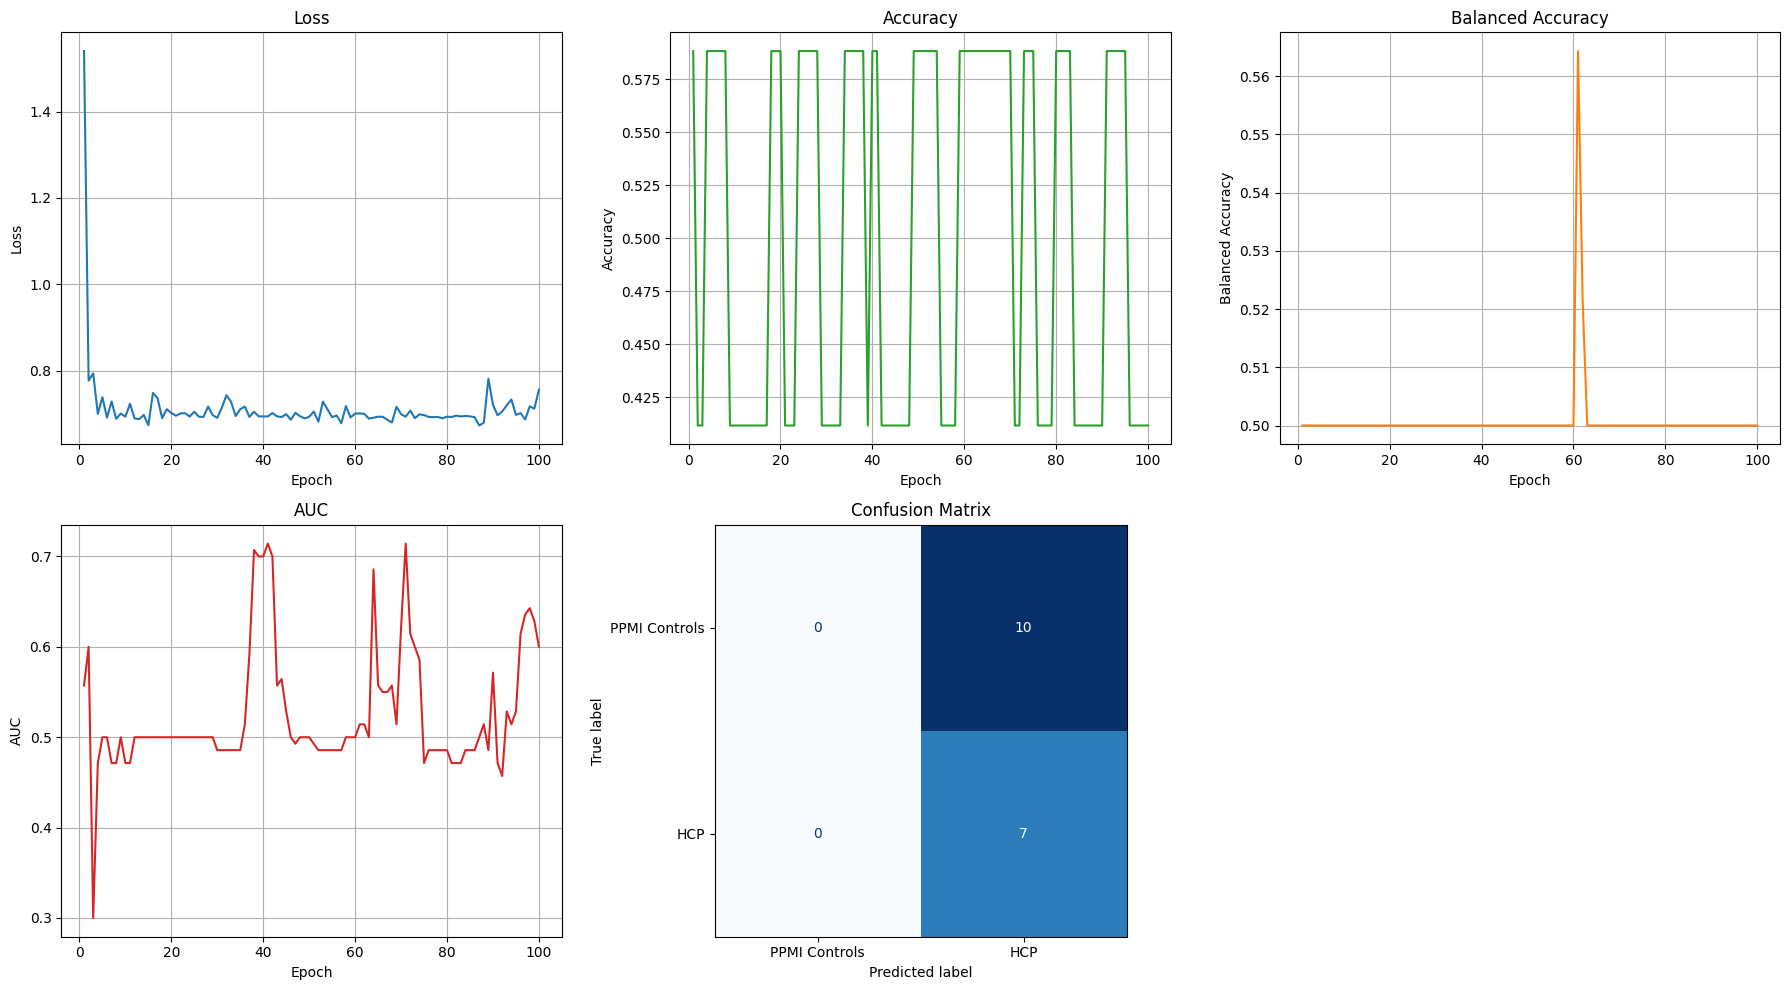

In [ ]:
# Method 1: Quantile matching (most robust)
harmonized_dataset = dp.create_harmonized_dataset(
    data_dict_ppmi, control_keys, data_dict_hcp,
    harmonization_method='quantile_matching'
)

print("Dataset size:", len(harmonized_dataset))

train_loader, val_loader = te.train_val_split(
        harmonized_dataset, val_size=0.2, random_state=RNG_SEED, batch_size=BATCH_SIZE
)

te.train(
    mnn.TransformerClassifier(), train_loader, val_loader,
    device=DEVICE, epochs=EPOCHS*4, lr=LR, plot=True, class_names=["PPMI Controls", "HCP"])


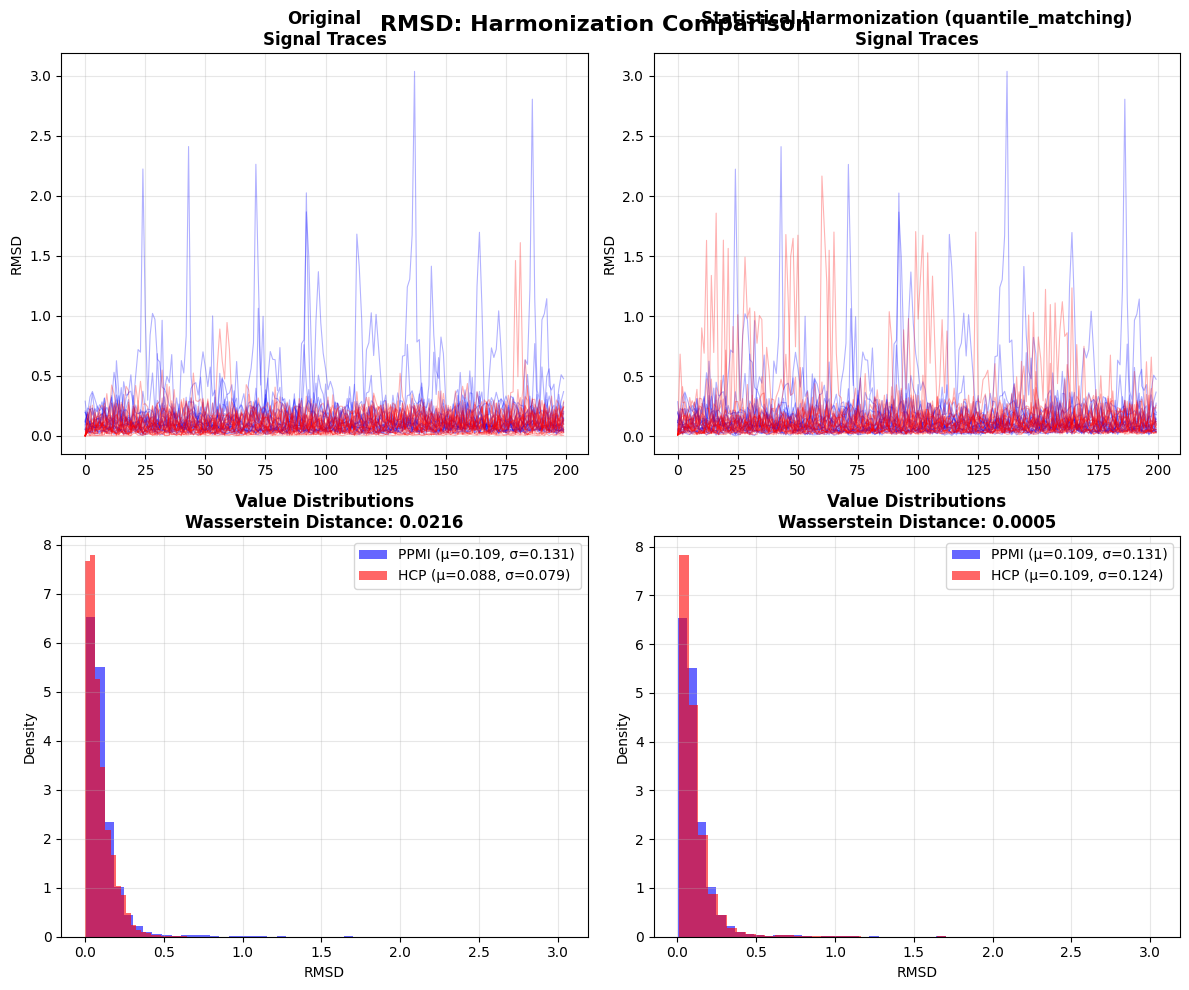

Summary Statistics:

Original:
  Mean difference: 0.0216
  Std ratio (PPMI/HCP): 1.644
  Wasserstein distance: 0.0216

Statistical Harmonization (quantile_matching):
  Mean difference: 0.0004
  Std ratio (PPMI/HCP): 1.051
  Wasserstein distance: 0.0005


In [ ]:
# Test quantile matching (usually most effective)
dp.plot_harmonization_comparison(
    data_dict_ppmi, control_keys, data_dict_hcp,
    feature_idx=1,
    harmonization_method='quantile_matching'
)


Creating balanced PD classification dataset:
  PPMI PD patients: 320
  PPMI controls: 44
  HCP available: 724
  Strategy: match_pd
  PPMI controls to use: 44
  HCP samples to use: 276
  Total controls: 320
  PD patients: 320
  Final ratio (Controls:PD): 1.0:1
  Harmonizing 276 HCP samples to match PPMI distribution...

Created balanced PD classification dataset:
  Total controls: 320 (PPMI: 44, HCP harmonized: 276)
  Total PD: 320
  Total samples: 640
  Class balance ratio: 1.00:1 (Controls:PD)
  Harmonization method: quantile_matching
Dataset size: 640
Balance ratio: 1.0:1 (Controls:PD)


Epoch 01/125  loss=0.7080  val_acc=0.547  val_bal_acc=0.500  val_auc=0.612


Epoch 02/125  loss=0.6995  val_acc=0.453  val_bal_acc=0.500  val_auc=0.602


Epoch 03/125  loss=0.6855  val_acc=0.617  val_bal_acc=0.622  val_auc=0.636


Epoch 04/125  loss=0.6888  val_acc=0.578  val_bal_acc=0.574  val_auc=0.648


Epoch 05/125  loss=0.6848  val_acc=0.602  val_bal_acc=0.609  val_auc=0.653


Epoch 06/125  loss=0.6772  val_acc=0.555  val_bal_acc=0.550  val_auc=0.593


Epoch 07/125  loss=0.7007  val_acc=0.586  val_bal_acc=0.567  val_auc=0.601


Epoch 08/125  loss=0.6992  val_acc=0.562  val_bal_acc=0.581  val_auc=0.668


Epoch 09/125  loss=0.6798  val_acc=0.508  val_bal_acc=0.541  val_auc=0.646


Epoch 10/125  loss=0.6791  val_acc=0.586  val_bal_acc=0.610  val_auc=0.616


Epoch 11/125  loss=0.6974  val_acc=0.594  val_bal_acc=0.572  val_auc=0.610


Epoch 12/125  loss=0.6827  val_acc=0.586  val_bal_acc=0.582  val_auc=0.620


Epoch 13/125  loss=0.6814  val_acc=0.492  val_bal_acc=0.528  val_auc=0.657


Epoch 14/125  loss=0.6592  val_acc=0.594  val_bal_acc=0.561  val_auc=0.645


Epoch 15/125  loss=0.6729  val_acc=0.594  val_bal_acc=0.606  val_auc=0.605


Epoch 16/125  loss=0.6967  val_acc=0.602  val_bal_acc=0.587  val_auc=0.605


Epoch 17/125  loss=0.6858  val_acc=0.531  val_bal_acc=0.558  val_auc=0.609


Epoch 18/125  loss=0.6815  val_acc=0.570  val_bal_acc=0.564  val_auc=0.618


Epoch 19/125  loss=0.6698  val_acc=0.602  val_bal_acc=0.587  val_auc=0.650


Epoch 20/125  loss=0.6782  val_acc=0.594  val_bal_acc=0.583  val_auc=0.640


Epoch 21/125  loss=0.6784  val_acc=0.508  val_bal_acc=0.540  val_auc=0.618


Epoch 22/125  loss=0.7000  val_acc=0.609  val_bal_acc=0.581  val_auc=0.632


Epoch 23/125  loss=0.6846  val_acc=0.477  val_bal_acc=0.514  val_auc=0.667


Epoch 24/125  loss=0.6920  val_acc=0.617  val_bal_acc=0.603  val_auc=0.633


Epoch 25/125  loss=0.6754  val_acc=0.570  val_bal_acc=0.564  val_auc=0.623


Epoch 26/125  loss=0.6802  val_acc=0.602  val_bal_acc=0.619  val_auc=0.657


Epoch 27/125  loss=0.6802  val_acc=0.594  val_bal_acc=0.593  val_auc=0.651


Epoch 28/125  loss=0.6561  val_acc=0.609  val_bal_acc=0.609  val_auc=0.644


Epoch 29/125  loss=0.6664  val_acc=0.594  val_bal_acc=0.609  val_auc=0.657


Epoch 30/125  loss=0.6567  val_acc=0.617  val_bal_acc=0.613  val_auc=0.630


Epoch 31/125  loss=0.6800  val_acc=0.555  val_bal_acc=0.578  val_auc=0.650


Epoch 32/125  loss=0.6789  val_acc=0.570  val_bal_acc=0.566  val_auc=0.640


Epoch 33/125  loss=0.6580  val_acc=0.602  val_bal_acc=0.605  val_auc=0.654


Epoch 34/125  loss=0.6439  val_acc=0.594  val_bal_acc=0.606  val_auc=0.621


Epoch 35/125  loss=0.6602  val_acc=0.617  val_bal_acc=0.597  val_auc=0.662


Epoch 36/125  loss=0.6743  val_acc=0.578  val_bal_acc=0.570  val_auc=0.621


Epoch 37/125  loss=0.6681  val_acc=0.625  val_bal_acc=0.625  val_auc=0.658


Epoch 38/125  loss=0.6662  val_acc=0.555  val_bal_acc=0.577  val_auc=0.651


Epoch 39/125  loss=0.6607  val_acc=0.594  val_bal_acc=0.568  val_auc=0.623


Epoch 40/125  loss=0.6578  val_acc=0.609  val_bal_acc=0.616  val_auc=0.654


Epoch 41/125  loss=0.6484  val_acc=0.625  val_bal_acc=0.617  val_auc=0.649


Epoch 42/125  loss=0.6456  val_acc=0.617  val_bal_acc=0.610  val_auc=0.653


Epoch 43/125  loss=0.6538  val_acc=0.609  val_bal_acc=0.601  val_auc=0.660


Epoch 44/125  loss=0.6498  val_acc=0.633  val_bal_acc=0.633  val_auc=0.653


Epoch 45/125  loss=0.6592  val_acc=0.609  val_bal_acc=0.607  val_auc=0.632


Epoch 46/125  loss=0.6561  val_acc=0.555  val_bal_acc=0.574  val_auc=0.644


Epoch 47/125  loss=0.6485  val_acc=0.602  val_bal_acc=0.606  val_auc=0.636


Epoch 48/125  loss=0.6505  val_acc=0.602  val_bal_acc=0.612  val_auc=0.657


Epoch 49/125  loss=0.6630  val_acc=0.609  val_bal_acc=0.597  val_auc=0.634


Epoch 50/125  loss=0.6568  val_acc=0.625  val_bal_acc=0.628  val_auc=0.665


Epoch 51/125  loss=0.6582  val_acc=0.586  val_bal_acc=0.607  val_auc=0.677


Epoch 52/125  loss=0.6641  val_acc=0.625  val_bal_acc=0.622  val_auc=0.669


Epoch 53/125  loss=0.6554  val_acc=0.594  val_bal_acc=0.587  val_auc=0.655


Epoch 54/125  loss=0.6533  val_acc=0.648  val_bal_acc=0.643  val_auc=0.662


Epoch 55/125  loss=0.6549  val_acc=0.641  val_bal_acc=0.649  val_auc=0.675


Epoch 56/125  loss=0.6568  val_acc=0.602  val_bal_acc=0.597  val_auc=0.644


Epoch 57/125  loss=0.6448  val_acc=0.633  val_bal_acc=0.624  val_auc=0.660


Epoch 58/125  loss=0.6435  val_acc=0.633  val_bal_acc=0.645  val_auc=0.666


Epoch 59/125  loss=0.6409  val_acc=0.641  val_bal_acc=0.626  val_auc=0.669


Epoch 60/125  loss=0.6629  val_acc=0.609  val_bal_acc=0.625  val_auc=0.666


Epoch 61/125  loss=0.6633  val_acc=0.656  val_bal_acc=0.635  val_auc=0.677


Epoch 62/125  loss=0.6438  val_acc=0.633  val_bal_acc=0.623  val_auc=0.662


Epoch 63/125  loss=0.6430  val_acc=0.641  val_bal_acc=0.632  val_auc=0.672


Epoch 64/125  loss=0.6333  val_acc=0.633  val_bal_acc=0.642  val_auc=0.677


Epoch 65/125  loss=0.6455  val_acc=0.617  val_bal_acc=0.631  val_auc=0.653


Epoch 66/125  loss=0.6577  val_acc=0.648  val_bal_acc=0.642  val_auc=0.696


Epoch 67/125  loss=0.6513  val_acc=0.617  val_bal_acc=0.597  val_auc=0.662


Epoch 68/125  loss=0.6480  val_acc=0.609  val_bal_acc=0.622  val_auc=0.671


Epoch 69/125  loss=0.6592  val_acc=0.641  val_bal_acc=0.649  val_auc=0.682


Epoch 70/125  loss=0.6491  val_acc=0.609  val_bal_acc=0.585  val_auc=0.650


Epoch 71/125  loss=0.6538  val_acc=0.648  val_bal_acc=0.655  val_auc=0.656


Epoch 72/125  loss=0.6182  val_acc=0.617  val_bal_acc=0.612  val_auc=0.639


Epoch 73/125  loss=0.6560  val_acc=0.617  val_bal_acc=0.617  val_auc=0.664


Epoch 74/125  loss=0.6534  val_acc=0.609  val_bal_acc=0.594  val_auc=0.660


Epoch 75/125  loss=0.6365  val_acc=0.664  val_bal_acc=0.656  val_auc=0.689


Epoch 76/125  loss=0.6424  val_acc=0.625  val_bal_acc=0.632  val_auc=0.672


Epoch 77/125  loss=0.6245  val_acc=0.617  val_bal_acc=0.609  val_auc=0.659


Epoch 78/125  loss=0.6261  val_acc=0.680  val_bal_acc=0.673  val_auc=0.701


Epoch 79/125  loss=0.6350  val_acc=0.609  val_bal_acc=0.603  val_auc=0.674


Epoch 80/125  loss=0.6430  val_acc=0.648  val_bal_acc=0.653  val_auc=0.694


Epoch 81/125  loss=0.6514  val_acc=0.578  val_bal_acc=0.597  val_auc=0.670


Epoch 82/125  loss=0.6174  val_acc=0.633  val_bal_acc=0.641  val_auc=0.683


Epoch 83/125  loss=0.6414  val_acc=0.609  val_bal_acc=0.606  val_auc=0.651


Epoch 84/125  loss=0.6369  val_acc=0.648  val_bal_acc=0.650  val_auc=0.688


Epoch 85/125  loss=0.6439  val_acc=0.602  val_bal_acc=0.581  val_auc=0.659


Epoch 86/125  loss=0.6541  val_acc=0.633  val_bal_acc=0.635  val_auc=0.653


Epoch 87/125  loss=0.6637  val_acc=0.555  val_bal_acc=0.578  val_auc=0.669


Epoch 88/125  loss=0.6432  val_acc=0.648  val_bal_acc=0.628  val_auc=0.674


Epoch 89/125  loss=0.6358  val_acc=0.664  val_bal_acc=0.674  val_auc=0.677


Epoch 90/125  loss=0.6345  val_acc=0.656  val_bal_acc=0.641  val_auc=0.658


Epoch 91/125  loss=0.6185  val_acc=0.617  val_bal_acc=0.626  val_auc=0.659


Epoch 92/125  loss=0.6585  val_acc=0.641  val_bal_acc=0.643  val_auc=0.667


Epoch 93/125  loss=0.6542  val_acc=0.664  val_bal_acc=0.646  val_auc=0.697


Epoch 94/125  loss=0.6572  val_acc=0.680  val_bal_acc=0.682  val_auc=0.691


Epoch 95/125  loss=0.6320  val_acc=0.664  val_bal_acc=0.659  val_auc=0.687


Epoch 96/125  loss=0.6397  val_acc=0.625  val_bal_acc=0.633  val_auc=0.660


Epoch 97/125  loss=0.6381  val_acc=0.625  val_bal_acc=0.632  val_auc=0.667


Epoch 98/125  loss=0.6495  val_acc=0.578  val_bal_acc=0.555  val_auc=0.642


Epoch 99/125  loss=0.6560  val_acc=0.672  val_bal_acc=0.672  val_auc=0.685


Epoch 100/125  loss=0.6291  val_acc=0.617  val_bal_acc=0.617  val_auc=0.685


Epoch 101/125  loss=0.6338  val_acc=0.641  val_bal_acc=0.640  val_auc=0.676


Epoch 102/125  loss=0.6498  val_acc=0.625  val_bal_acc=0.604  val_auc=0.694


Epoch 103/125  loss=0.6359  val_acc=0.648  val_bal_acc=0.658  val_auc=0.683


Epoch 104/125  loss=0.6193  val_acc=0.641  val_bal_acc=0.646  val_auc=0.669


Epoch 105/125  loss=0.6488  val_acc=0.625  val_bal_acc=0.600  val_auc=0.698


Epoch 106/125  loss=0.6497  val_acc=0.570  val_bal_acc=0.592  val_auc=0.703


Epoch 107/125  loss=0.6434  val_acc=0.641  val_bal_acc=0.637  val_auc=0.641


Epoch 108/125  loss=0.6459  val_acc=0.664  val_bal_acc=0.656  val_auc=0.663


Epoch 109/125  loss=0.6474  val_acc=0.625  val_bal_acc=0.635  val_auc=0.702


Epoch 110/125  loss=0.6167  val_acc=0.672  val_bal_acc=0.651  val_auc=0.695


Epoch 111/125  loss=0.6372  val_acc=0.633  val_bal_acc=0.644  val_auc=0.700


Epoch 112/125  loss=0.6154  val_acc=0.641  val_bal_acc=0.642  val_auc=0.685


Epoch 113/125  loss=0.6320  val_acc=0.664  val_bal_acc=0.650  val_auc=0.682


Epoch 114/125  loss=0.6362  val_acc=0.578  val_bal_acc=0.598  val_auc=0.701


Epoch 115/125  loss=0.6320  val_acc=0.664  val_bal_acc=0.641  val_auc=0.693


Epoch 116/125  loss=0.6287  val_acc=0.625  val_bal_acc=0.623  val_auc=0.661


Epoch 117/125  loss=0.6640  val_acc=0.656  val_bal_acc=0.661  val_auc=0.675


Epoch 118/125  loss=0.6324  val_acc=0.641  val_bal_acc=0.632  val_auc=0.683


Epoch 119/125  loss=0.6222  val_acc=0.633  val_bal_acc=0.639  val_auc=0.677


Epoch 120/125  loss=0.6047  val_acc=0.656  val_bal_acc=0.658  val_auc=0.692


Epoch 121/125  loss=0.6100  val_acc=0.625  val_bal_acc=0.636  val_auc=0.707


Epoch 122/125  loss=0.6171  val_acc=0.648  val_bal_acc=0.655  val_auc=0.700


Epoch 123/125  loss=0.5975  val_acc=0.672  val_bal_acc=0.667  val_auc=0.688


Epoch 124/125  loss=0.6424  val_acc=0.656  val_bal_acc=0.664  val_auc=0.702


Epoch 125/125  loss=0.6293  val_acc=0.664  val_bal_acc=0.660  val_auc=0.699


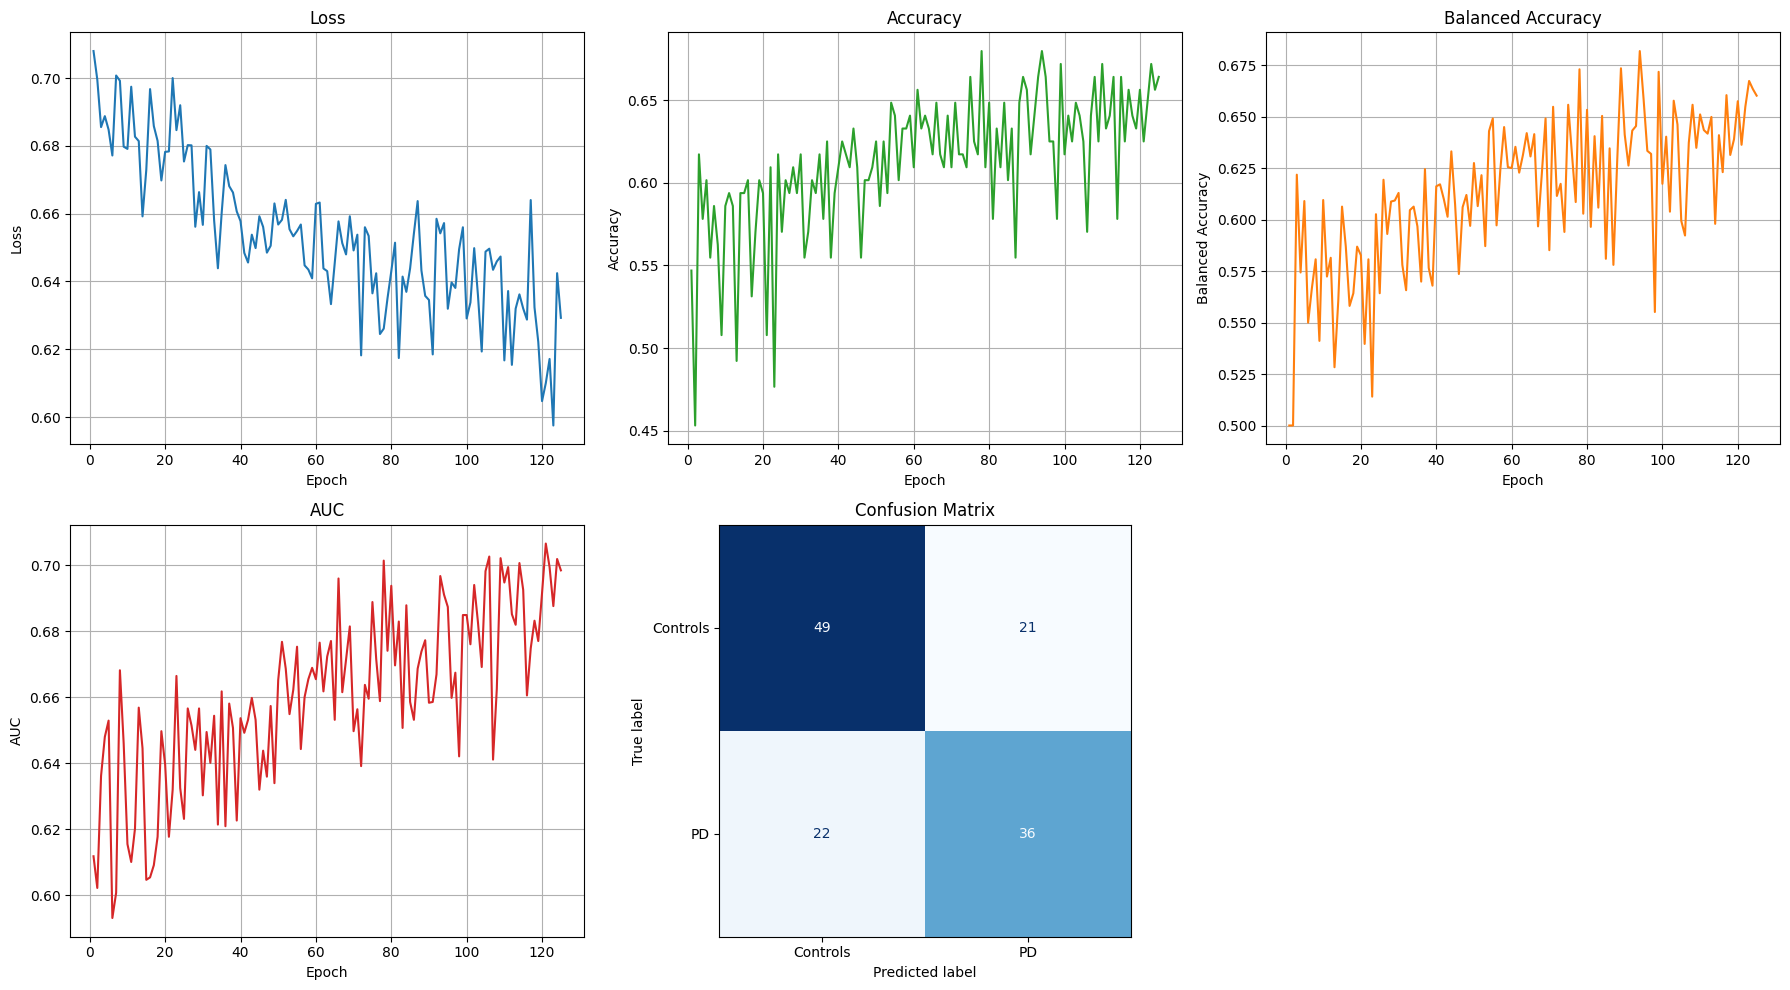

In [ ]:
# Create balanced dataset: Controls = PD patients
balanced_pd_dataset, info = dp.create_balanced_pd_classification_dataset(
    data_dict_ppmi, pd_keys, control_keys, data_dict_hcp,
    feature_idx=1,  # RMSD
    harmonization_method='quantile_matching',
    balance_strategy='match_pd'  # Total controls = number of PD patients
)

print(f"Dataset size: {len(balanced_pd_dataset)}")
print(f"Balance ratio: {info['balance_ratio']:.1f}:1 (Controls:PD)")

# Train your model
train_loader, val_loader = te.train_val_split(
    balanced_pd_dataset, val_size=0.2, random_state=RNG_SEED, batch_size=BATCH_SIZE
)

te.train(
    mnn.TransformerClassifier(), train_loader, val_loader,
    device=DEVICE, epochs=EPOCHS*5, lr=LR / 5, plot=True, 
    class_names=["Controls", "PD"]  # Now these labels are correct!
)
